<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

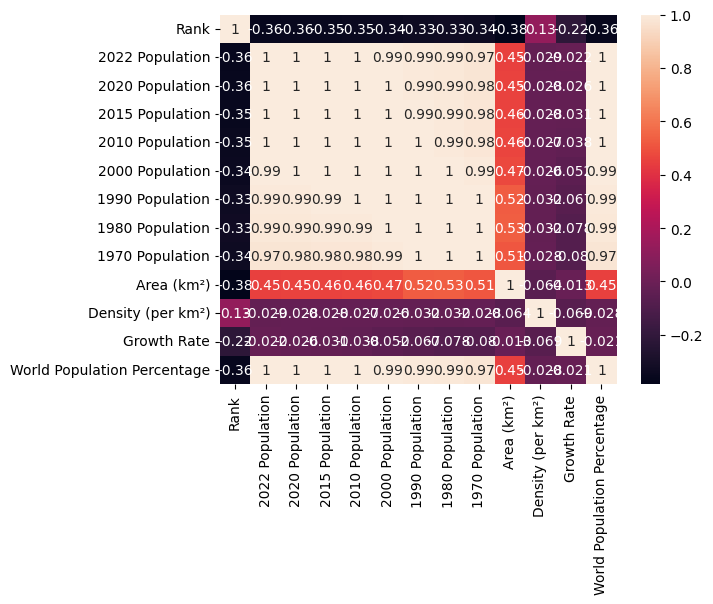

"\ndf3 = df2.transpose()\ndf3.plot()\n\ndf.boxplot(figsize=(20,10))\nplt.show()\n\ndf.select_dtypes(include='object') #Filter data based on datatype\n"

In [1]:
#EDA In python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r".\Pandas_Files\world_population.csv")

#Set float values to display with 2 decimal places only
pd.set_option('display.float_format',lambda x:'%.2f' % x) 

df.info()
df.describe()

#Finding null and unique values
print(df.isnull().sum())
print(df.nunique())

#Check countries with largest population
print(df.sort_values(by='2022 Population',ascending=False).head())

#Understand a correlation between data columns
df.corr(numeric_only=True)

#Creating a heatmap to visualize the above correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

In [92]:
#Growth rate by continents
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].sum().sort_values(by='2022 Population',ascending=False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,2104314136.00,1933360000.00,2334719776.00,3706718415.00,4187125190.00,4458250182.00,4652801584.00,4720041978.00
Africa,361194640.00,480817791.00,637110013.00,817508493.00,1020502655.00,1156663993.00,1360671810.00,1425529262.00
Europe,655923991.00,681600217.00,709689789.00,726066600.00,735613934.00,736345252.00,745792196.00,737713219.00
North America,315434606.00,368293361.00,421266425.00,486069584.00,542720651.00,570383850.00,594236593.00,600296136.00
South America,192947156.00,241789006.00,297146415.00,325206553.00,348262142.00,413134396.00,431530043.00,436816608.00
Oceania,19480270.00,22920240.00,26743822.00,31222778.00,37102764.00,40403283.00,43933426.00,45020499.00


<Axes: >

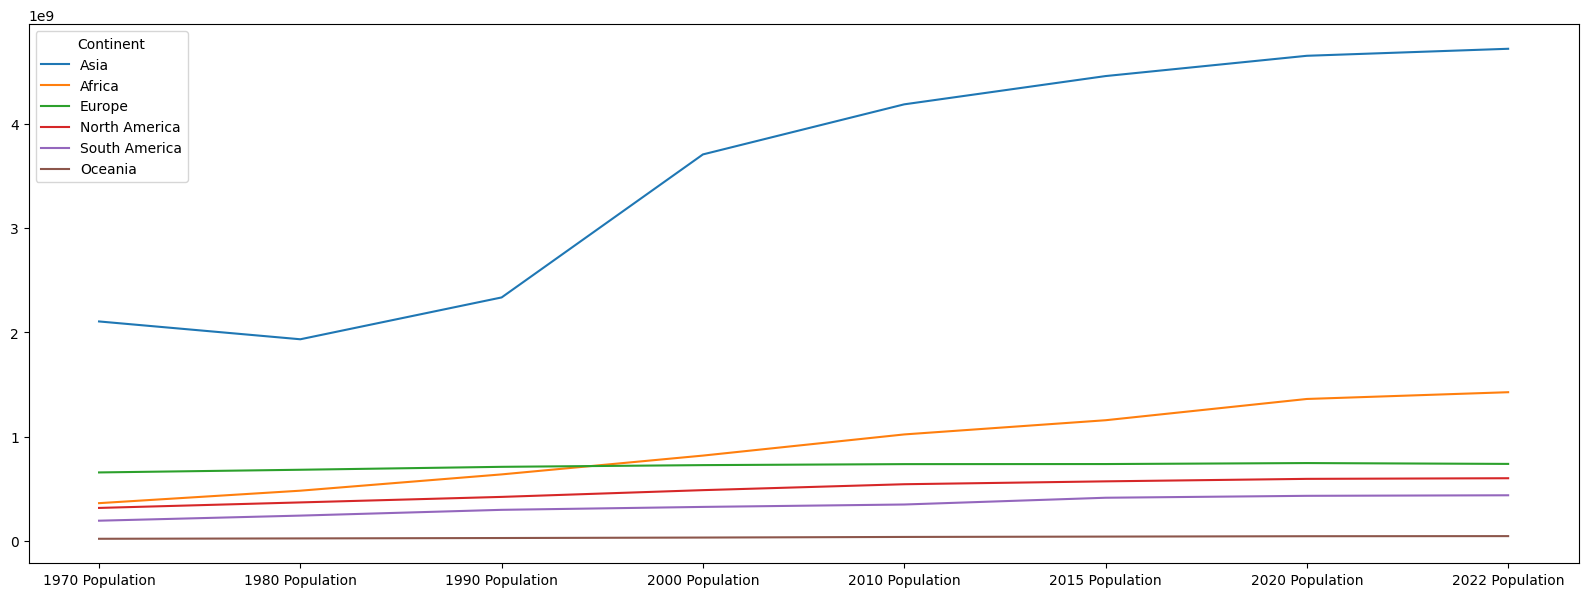

In [93]:
#Visualizing growth of population of continents
df3 = df2.transpose()
df3.plot()

<Axes: xlabel='Country', ylabel='Density (per km²)'>

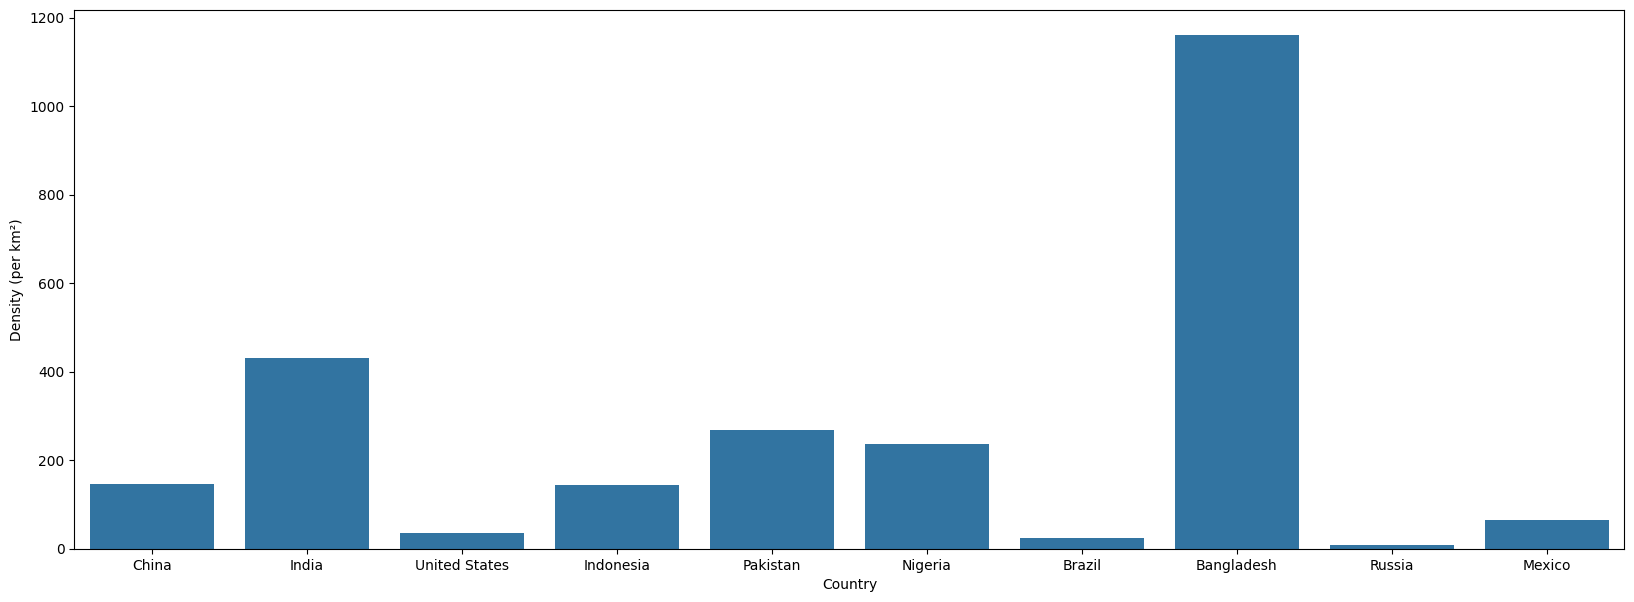

In [48]:
#Plotting density variation of top 10 countries with respect to 2022 population
df5 = df.sort_values(by='2022 Population', ascending = False)
df5 = df5.iloc[:10,:]
sns.barplot(df5, x = 'Country', y ='Density (per km²)')

([<matplotlib.patches.Wedge at 0x1ec165acf50>,
 [Text(-0.32171208388047967, 1.0780196357605363, 'Asia'),
  Text(-0.46792728314388227, -1.0230684521035653, 'Africa'),
  Text(0.465029616574052, -1.024388820570095, 'Europe'),
  Text(0.9187137109214409, -0.6492997130485699, 'North America'),
  Text(1.1010152274828129, -0.23106377658769903, 'South America'),
  Text(1.1248318191258029, -0.019451958311105754, 'Oceania')])

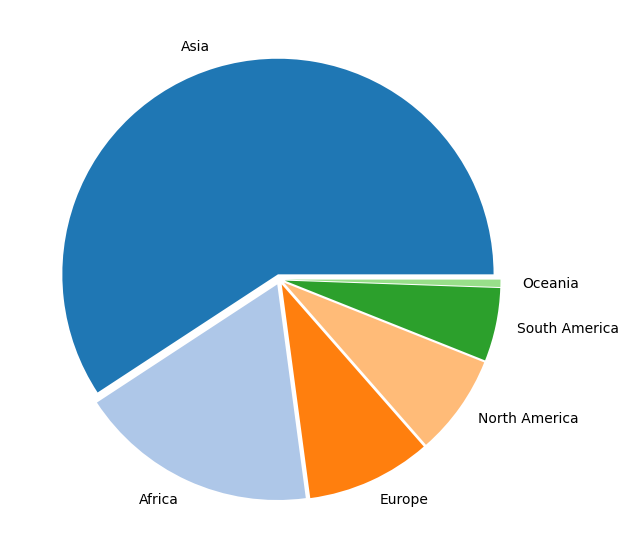

In [126]:
#Visualizing World Population Percentage for different continents
df6 = df.groupby('Continent').sum().sort_values('World Population Percentage',ascending=False)
df6 = df6.reset_index()
df6 = df6[['Continent','World Population Percentage']]
df6

plt.pie(df6['World Population Percentage'], labels = df6['Continent'], explode = [0.025]*6, colors = sns.color_palette('tab20'))
